#PROPET REMA LSTM

In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
data = pd.read_csv("./a.csv")
#print(data.shape)
data.columns

data.drop('Unnamed: 0', axis=1, inplace=True)
display(data)
data.info()

,기간,고유황중유(180cst/3.5%),종가,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",POILBREUSDM,POILDUBUSDM,POILWTIUSDM
0,2008-01-01,75.45,936.10,99.64,92.091739,87.222609,92.982609
1,2008-01-02,75.45,936.95,99.64,92.091739,87.222609,92.982609
2,2008-01-03,79.04,936.50,99.17,92.091739,87.222609,92.982609
3,2008-01-04,79.77,938.45,97.90,92.091739,87.222609,92.982609
4,2008-01-05,79.51,940.70,95.08,92.091739,87.222609,92.982609
...,...,...,...,...,...,...,...
5980,2024-05-16,79.62,1347.31,80.71,88.974545,90.869545,85.347273
5981,2024-05-17,80.15,1353.22,80.71,88.974545,90.869545,85.347273
5982,2024-05-18,81.88,1354.39,80.71,88.974545,90.869545,85.347273
5983,2024-05-19,81.88,1354.39,80.71,88.974545,90.869545,85.347273


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5985 entries, 0 to 5984
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   기간                                                   5985 non-null   object 
 1   고유황중유(180cst/3.5%)                                   5985 non-null   float64
 2   종가                                                   5985 non-null   float64
 3   Cushing, OK WTI Spot Price FOB (Dollars per Barrel)  5985 non-null   float64
 4   POILBREUSDM                                          5985 non-null   float64
 5   POILDUBUSDM                                          5985 non-null   float64
 6   POILWTIUSDM                                          5985 non-null   float64
dtypes: float64(6), object(1)
memory usage: 327.4+ KB


In [42]:
data["기간"] = pd.to_datetime(data["기간"])
train = data[data["기간"] < pd.to_datetime("2024-01-01")]
test = data[data["기간"] >= pd.to_datetime("2024-01-01")]
train.info()
test.info()
train.rename({'기간':'ds', '고유황중유(180cst/3.5%)':'y'}, axis=1, inplace=True)
# 시간값은 ds, 타겟값은 y로 변경해주면 프로펫이 알아서 인식한다
# 다른 설정없이 모델을 만들어줬다.

<class 'pandas.core.frame.DataFrame'>
Index: 5844 entries, 0 to 5843
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   기간                                                   5844 non-null   datetime64[ns]
 1   고유황중유(180cst/3.5%)                                   5844 non-null   float64       
 2   종가                                                   5844 non-null   float64       
 3   Cushing, OK WTI Spot Price FOB (Dollars per Barrel)  5844 non-null   float64       
 4   POILBREUSDM                                          5844 non-null   float64       
 5   POILDUBUSDM                                          5844 non-null   float64       
 6   POILWTIUSDM                                          5844 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 365.2 KB
<class 'pandas.core.frame.DataFrame'>

C:\Users\user\AppData\Local\Temp\ipykernel_28608\1616094108.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1]:
# Prophet 모델 생성 및 학습
prophet = Prophet()

# 예측 기간 설정 (90일)
future = prophet.make_future_dataframe(periods=90, freq='d')

# 예측 수행
forecast = prophet.predict(future)

# 역변환 및 결과 출력
forecast['y'] = scaler.inverse_transform(forecast[['y']])
print("\n예측 결과:")
print(forecast.tail(5))
prophet = Prophet()
prophet.fit(Target)

# 학습도 간편하다.
future = prophet.make_future_dataframe(periods=90, freq = 'd')
# 다음은 예측하는 기간을 만들어준다. 113일 freq = 'd 를 안써도 day로 인식을 할거다.
# 주, 월 값을 넣어줄 있다. 찾아보자.
forecast = prophet.predict(future)
# 예측
forecast.tail(5)

NameError: name 'Prophet' is not defined

아무것도 안건드린 모델 MSE : 47.89118763729932


C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

16:39:39 - cmdstanpy - INFO - Chain [1] start processing
16:39:54 - cmdstanpy - INFO - Chain [1] done processing


yearly_seasonality=20 건드린 모델 MSE : 46.252355914131904


C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\user\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



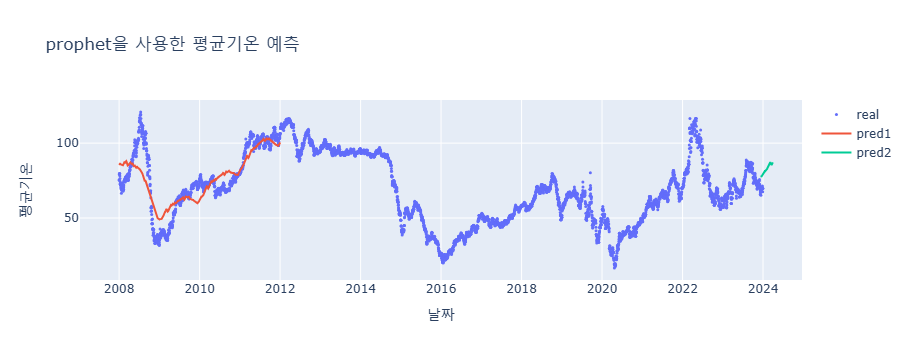

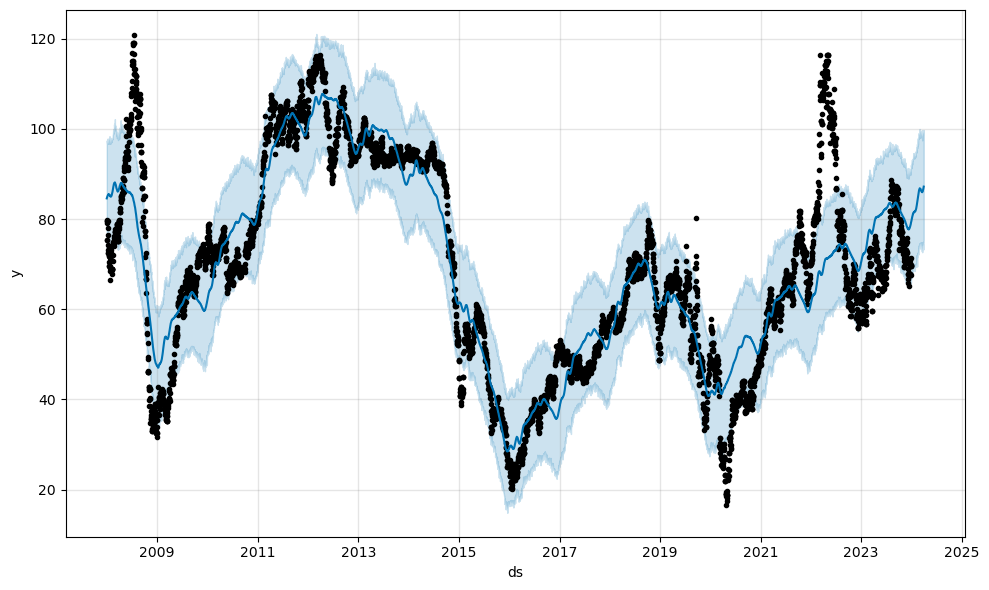

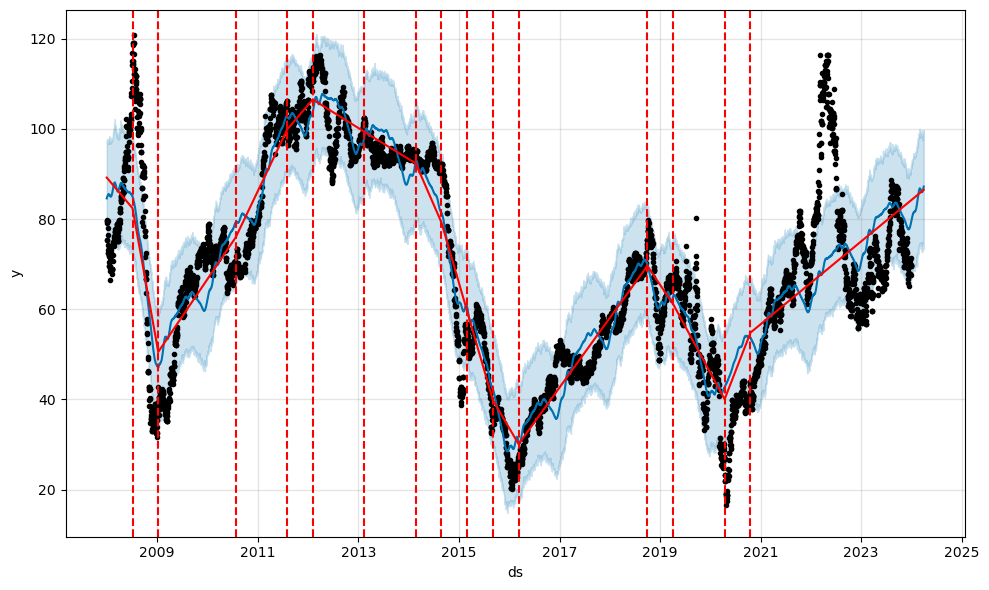

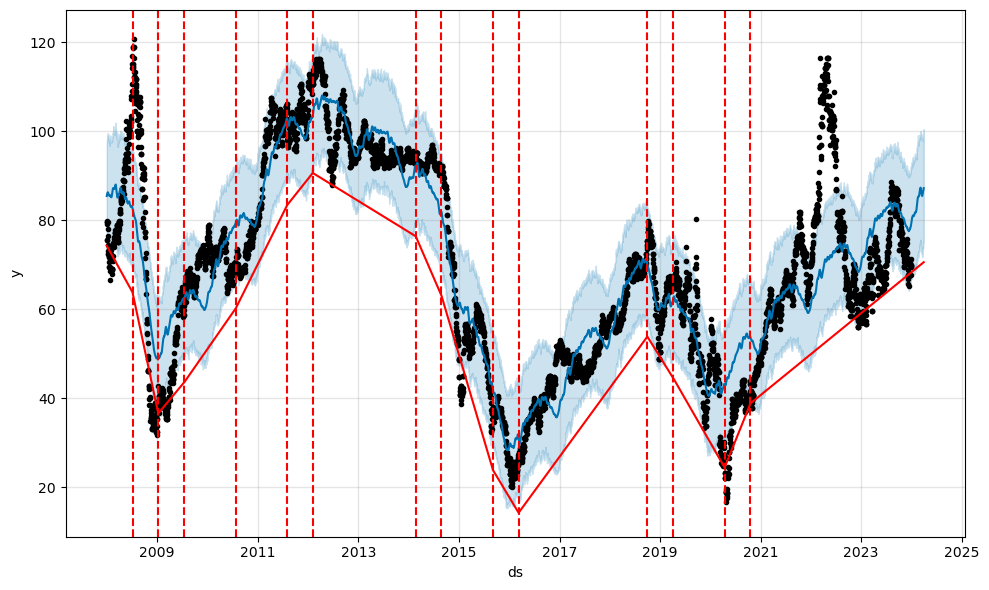

In [29]:
forecast[['ds','yhat']].tail(113)
# 간단하게 날짜와 타겟값만 보려면 이렇게 꺼내주면 되겠다.
# 이걸로 끝이다.
 
print('아무것도 안건드린 모델 MSE :',mean_squared_error(test['고유황중유(180cst/3.5%)'].tail(113), forecast['yhat'].tail(113)))
# 오차를 잘 봐두자.
 
fig = prophet.plot(forecast)
# 그래프로 결과를 확인하면 편하다.
# 점은 실제값이고 선은 예측값이다.
 
"""파라미터를 알아보자"""
 
from prophet.plot import add_changepoints_to_plot
 
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

prophet = Prophet(yearly_seasonality=20, weekly_seasonality=20, daily_seasonality=20)
prophet.fit(train)
forecast = prophet.predict(future)
# 위에 순정 모델에서 yearly_seasonality=20 만 지정해준 모습이다.
 
print('yearly_seasonality=20 건드린 모델 MSE :',mean_squared_error(test['고유황중유(180cst/3.5%)'].tail(113), forecast['yhat'].tail(113)))
# 오차를 잘 봐두자.
 
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=train['y'],
                    mode='markers',
                    marker=dict(size=3),
                    name='real'))
fig.add_trace(go.Scatter(x=forecast['ds'].head(1462), y=forecast['yhat'].head(1462),
                    mode='lines',
                    name='pred1'))
fig.add_trace(go.Scatter(x=forecast['ds'].tail(113), y=forecast['yhat'].tail(113),
                    mode='lines',
                    name='pred2'))
fig.update_layout(
    title='prophet을 사용한 평균기온 예측',
    xaxis_title='날짜',
    yaxis_title='평균기온')
 
fig.show()